# 6.1 Decision Tree 시각화

In [43]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [44]:
import pandas as pd

#iris data loading
iris=load_iris()

#iris.data는 iris 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음 
iris_data=iris.data
#iris.target은 레이블 값 numpy로 갖고 있음
iris_label=iris.target
print('iris target:',iris_label)
print('iris target 이름:',iris.target_names)

iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 이름: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [45]:

X_train,X_test,y_train,y_test=train_test_split(iris_data,iris_label,test_size=0.2,random_state=11)



In [46]:
#DecisirandomdonTreeClassifier 객체생성

dt_clf=DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

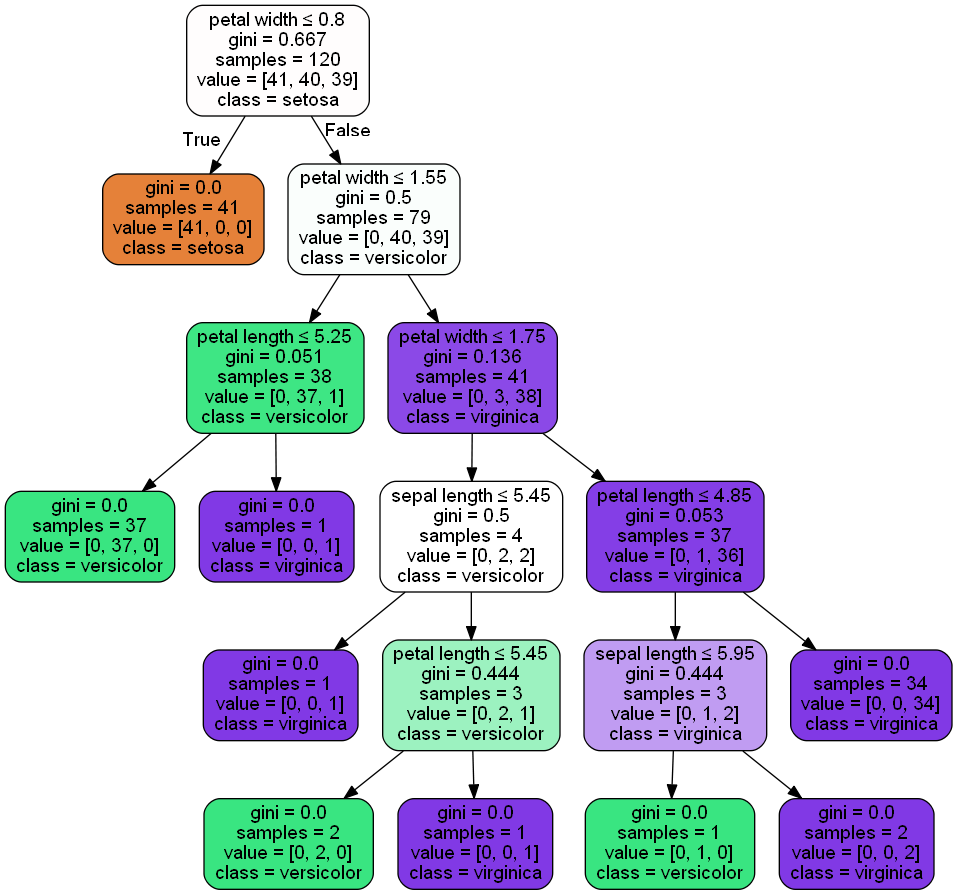

In [48]:
 #시각화
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# InvocationException: GraphViz's executables not found 해결
import os
os.environ["PATH"]+=os.pathsep+ 'C:/program Files (x86)/Graphviz2.38/bin/'



dot_data=export_graphviz(dt_clf, out_file=None, feature_names=['sepal length','sepal width','petal length','petal width'], class_names=iris.target_names,filled=True, rounded=True, special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 6.3 클래스 확률 추정

In [50]:
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [52]:
tree_clf.predict([[5,1.5]])

array([1])

# 6.8 회귀

In [53]:
from sklearn.tree import DecisionTreeRegressor
    
tree_reg =DecisionTreeRegressor(max_depth=2)

tree_reg.fit(X,y)    

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

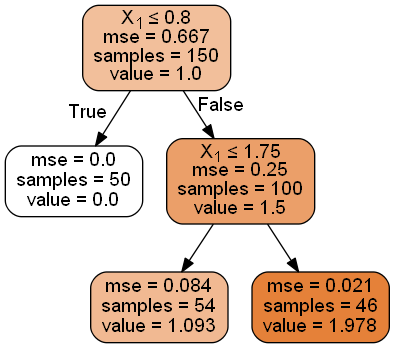

In [55]:
dot_data=export_graphviz(tree_reg, out_file=None,  class_names=iris.target_names,filled=True, rounded=True, special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())